In [68]:
import os
import numpy as np
import pandas as pd

from scipy import stats

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Accent')

In [2]:
df = pd.read_csv('data/netflix_titles.csv')

unique_shows = df.shape[0] - df.duplicated(subset=['show_id']).sum()
print(f'Number of Netflix films and TV series: {unique_shows}')

Number of Netflix films and TV series: 7787


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   show_id              7787 non-null   object 
 1   type                 7787 non-null   object 
 2   title                7787 non-null   object 
 3   director             5398 non-null   object 
 4   cast                 7069 non-null   object 
 5   country              7280 non-null   object 
 6   date_added           7777 non-null   object 
 7   release_year         7787 non-null   int64  
 8   rating               7780 non-null   object 
 9   duration             7787 non-null   object 
 10  listed_in            7787 non-null   object 
 11  description          7787 non-null   object 
 12  number_of_directors  5398 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 791.0+ KB


## Helpful functions

In [3]:
def get_column2show_data(column):
    
    show_cnt = {}
    row_idx = {}

    subset = df.dropna(subset=[column])

    for cols, row_index in zip(subset[column].values, subset.index):
        for col in cols.split(','):
            col = col.strip()
            n_shows = show_cnt.get(col, 0)
            show_cnt[col] = n_shows+1

            idxs = row_idx.get(col, [])
            idxs.append(row_index)
            row_idx[col] = idxs
    
    show_cnt = sorted(show_cnt.items(), reverse=True, key=lambda item: item[1])
    
    return show_cnt, row_idx

In [4]:
def get_person_genres(person, person2row_idx):
    person_shows = person2row_idx[person]
    genre_count = {}
    for genres in df.iloc[person_shows].listed_in:
        for genre in genres.split(','):
            gnr = genre.strip()
            count = genre_count.get(gnr, 0)
            genre_count[gnr] = count+1
            
    genre_count = sorted(genre_count.items(), reverse=True, key=lambda item: item[1])
    
    return genre_count

In [5]:
def number_of_directors(directors):
    try:
        return len(directors.split(','))
    except:
        return np.nan

## Show type

### Number of movies and TV Shows

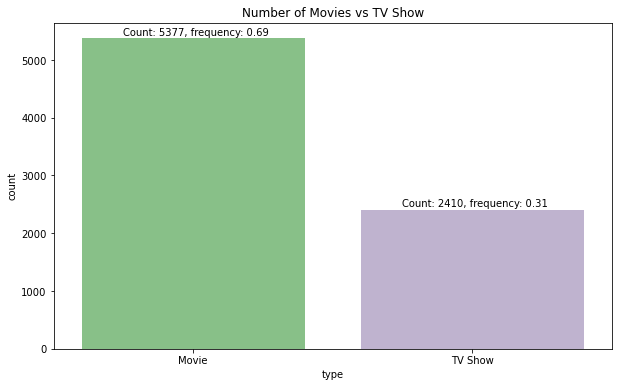

In [33]:
value_cnt = df.type.value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='type', order=value_cnt.index)
plt.title('Number of Movies vs TV Show')

for cat, count in zip(ax.patches, value_cnt.values):
    ax.annotate(f'Count: {count}, frequency: {round(count/df.shape[0], 2)}', (cat.get_x()+0.15, cat.get_height()+50))

### Common genres for show

In [106]:
show_types = ['Movie', 'TV Show']
show2row_idx = {show_type:df[df['type'] == show_type].index for show_type in show_types}

for show_type in show_types:
    print(f'{show_type} common genres: {get_person_genres(show_type, show2row_idx)}\n')

Movie common genres: [('International Movies', 2437), ('Dramas', 2106), ('Comedies', 1471), ('Documentaries', 786), ('Action & Adventure', 721), ('Independent Movies', 673), ('Children & Family Movies', 532), ('Romantic Movies', 531), ('Thrillers', 491), ('Stand-Up Comedy', 329), ('Music & Musicals', 321), ('Horror Movies', 312), ('Sci-Fi & Fantasy', 218), ('Sports Movies', 196), ('Classic Movies', 103), ('LGBTQ Movies', 90), ('Cult Movies', 59), ('Faith & Spirituality', 57), ('Anime Features', 57), ('Movies', 56)]

TV Show common genres: [('International TV Shows', 1199), ('TV Dramas', 704), ('TV Comedies', 525), ('Crime TV Shows', 427), ("Kids' TV", 414), ('Docuseries', 353), ('Romantic TV Shows', 333), ('British TV Shows', 232), ('Reality TV', 222), ('Korean TV Shows', 150), ('TV Action & Adventure', 150), ('Anime Series', 148), ('Spanish-Language TV Shows', 147), ('TV Mysteries', 90), ('Science & Nature TV', 85), ('TV Sci-Fi & Fantasy', 76), ('TV Horror', 69), ('Teen TV Shows', 60)

### Mean cast size per show type

In [38]:
df['cast_size'] = df['cast'].apply(number_of_directors)
cast = df.dropna(subset=['cast_size'])
cast['cast_size'] = cast['cast_size'].astype('int16')

C:\Users\sqrte\anaconda3\envs\ml_base\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean cast size for Movie: [7.7382347]
Mean cast size for TV Show: [8.33002833]


Text(0.5, 1.0, 'Cast size per show type')

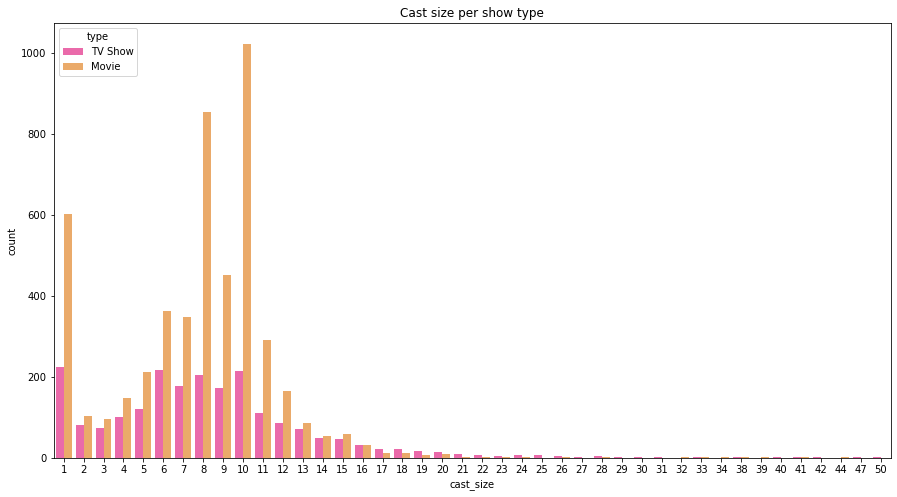

In [43]:
mean_cast = cast.groupby(by='type').agg({'cast_size':'mean'})

for tp, size in zip(mean_cast.index, mean_cast.values):
    print(f'Mean cast size for {tp}: {size}')
    
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=cast, x='cast_size', hue='type', palette='spring')
plt.title('Cast size per show type')

### Does mean cast size for movie and tv show differ statistically significantly?

H0: the means of two populations being tested have no statistically significant difference. <br>
Ha: the means of two populations differ statistically significant. 

In [114]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [115]:
%%time

movie_idx = cast[cast['type'] == 'Movie'].index
tv_idx = cast[cast['type'] == 'TV Show'].index

num_of_samples = 100

movie_cast_mean, tv_cast_mean = np.empty(num_of_samples), np.empty(num_of_samples)

movie_samples = get_bootstrap_samples(cast.cast_size.loc[movie_idx].values, num_of_samples)
tv_samples = get_bootstrap_samples(cast.cast_size.loc[tv_idx].values, num_of_samples)


for i in range(num_of_samples):
        movie_cast_mean[i], tv_cast_mean[i] = movie_samples[i].mean(), tv_samples[i].mean() 

Wall time: 25 ms


In [116]:
stats.ttest_ind(movie_cast_mean, tv_cast_mean)

Ttest_indResult(statistic=-42.106218775702246, pvalue=9.400087603349121e-101)

In [117]:
stats.mannwhitneyu(movie_cast_mean, tv_cast_mean, alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=2.560845048164455e-34)

### What countries produce most tv shows/movies?

In [47]:
group = df[df['type'] == 'Movie'].groupby(by=['type', 'country']).agg({'show_id':'count'}).reset_index()
group = group.sort_values(by=['show_id'], ascending=False)
group.head(3)

,type,country,show_id
475,Movie,United States,1850
195,Movie,India,852
399,Movie,United Kingdom,193


In [48]:
group = df[df['type'] == 'TV Show'].groupby(by=['type', 'country']).agg({'show_id':'count'}).reset_index()
group = group.sort_values(by=['show_id'], ascending=False)
group.head(3)

,type,country,show_id
151,TV Show,United States,705
132,TV Show,United Kingdom,204
77,TV Show,Japan,157


### Movies/show duration

In [51]:
def get_duration(row):
    return int(row.split(' ')[0])

df['int_duration'] = df['duration'].apply(get_duration)

#### TV Show

<AxesSubplot:xlabel='int_duration', ylabel='count'>

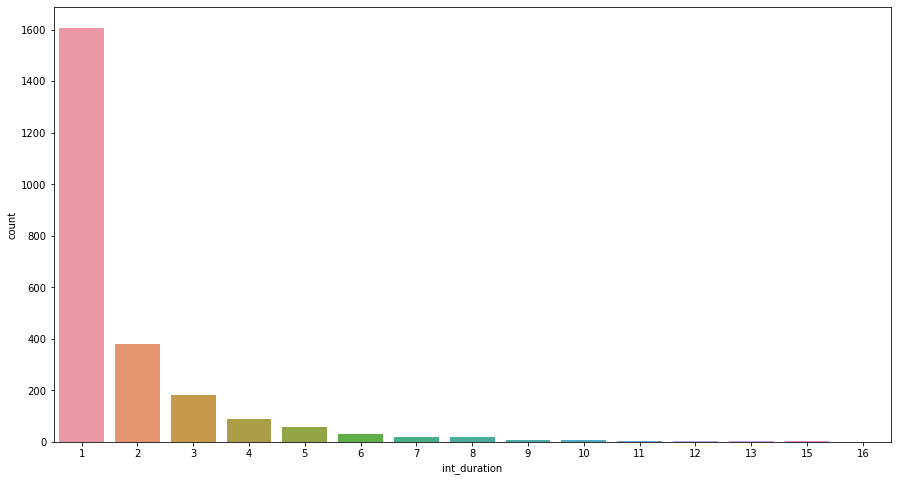

In [73]:
tv_sub = df[df['type'] == 'TV Show']

plt.figure(figsize=(15, 8))
sns.countplot(data=tv_sub, x='int_duration')

#### Movie

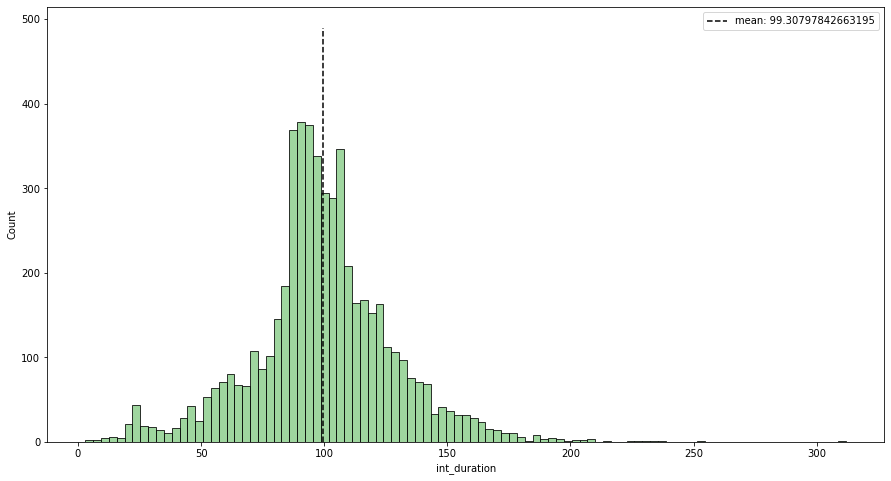

In [76]:
movie_sub = df[df['type'] == 'Movie']

plt.figure(figsize=(15, 8))
sns.histplot(data=movie_sub, x='int_duration')

mu = movie_sub.int_duration.mean()
x = np.ones(50) * mu
y = np.arange(0, 500, 10)
plt.plot(x, y, '--', color='black', label=f'mean: {mu}')
plt.legend()

#### Check distribution for normality

Shapiro-Wilk Test...
Distribution not normal with p=5.407088285675093e-31
D’Agostino’s K^2 Test...
Distribution not normal with p=9.821231906183562e-64


C:\Users\sqrte\anaconda3\envs\ml_base\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


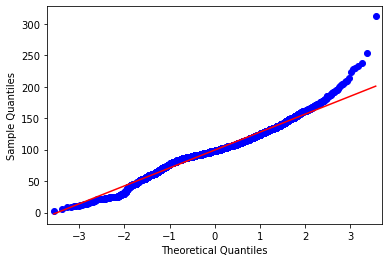

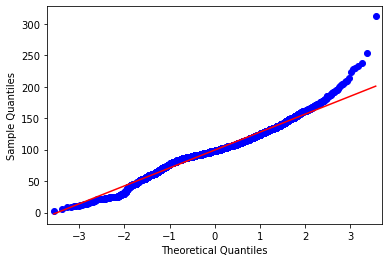

In [81]:
print('Shapiro-Wilk Test...')
stat, p = stats.shapiro(movie_sub.int_duration)
if p < 0.05:
    print(f'Distribution not normal with p={p}')
else:
    print(f'Distribution is notmal with p={p}')
    
print('D’Agostino’s K^2 Test...')
stat, p = stats.normaltest(movie_sub.int_duration)
if p < 0.05:
    print(f'Distribution not normal with p={p}')
else:
    print(f'Distribution is notmal with p={p}')    

qqplot(movie_sub.int_duration, line='s')

### Show count per year

In [137]:
group = df.groupby(by=['type', 'release_year']).agg({'show_id':'count'}).reset_index()
group.columns = ['type', 'year', 'cnt']

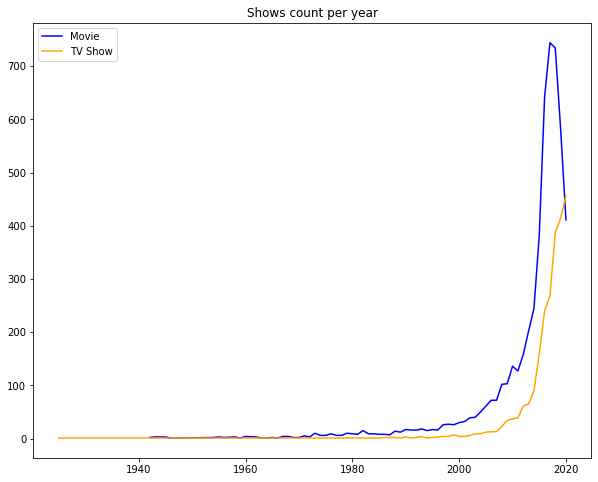

In [149]:
group = group[group['year'] < 2021]
movie_subset = group[group['type'] == 'Movie']
tv_subset = group[group['type'] == 'TV Show']

plt.figure(figsize=(10, 8))
plt.title('Shows count per year')
plt.plot(movie_subset.year, movie_subset.cnt, color='blue', label='Movie')
plt.plot(tv_subset.year, tv_subset.cnt, color='orange', label='TV Show')
plt.legend()

### Show count per month and year

In [150]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_size
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12.0


In [26]:
def get_month(row):
    return row.split(' ')[0]

group = df.copy()
group = group[(group['release_year'] > 2017) & (group['release_year'] < 2021)]
group = group.dropna(subset=['date_added'])
group['month'] = group['date_added'].apply(get_month)

In [27]:
group = group.groupby(by=['type', 'month', 'release_year']).agg({'show_id':'count'}).reset_index()
group.columns = ['type', 'month', 'year', 'cnt']

In [28]:
group.month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', ''],
      dtype=object)

In [29]:
group['month'] = group['month'].map({'January': 1,
                                     'February': 2,
                                     'March':3,
                                     'April':4,
                                     'May':5,
                                     'June':6,
                                     'July':7,
                                     'August':8,
                                     'September':9,
                                     'October':10,
                                     'November':11,
                                     'December':12})

years = group.year.unique()

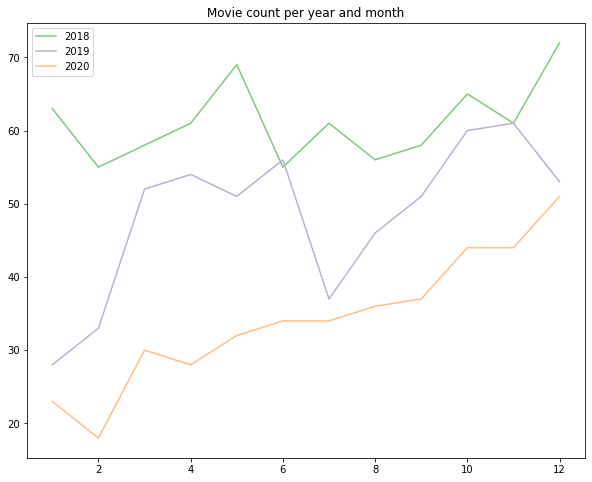

In [34]:
plt.figure(figsize=(10, 8))
plt.title('Movie count per year and month')

for year in years:
    sub = group[(group['year'] == year) & (group['type'] == 'Movie')]
    sub = sub.sort_values(by='month')
    plt.plot(sub.month, sub.cnt, label=year)
plt.legend()

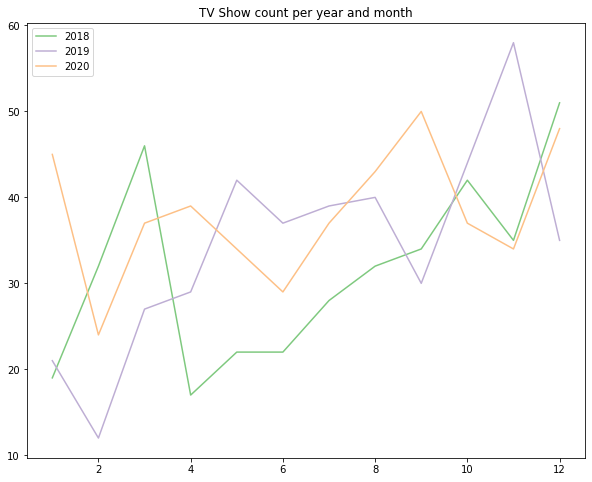

In [35]:
plt.figure(figsize=(10, 8))
plt.title('TV Show count per year and month')

for year in years:
    sub = group[(group['year'] == year) & (group['type'] == 'TV Show')]
    sub = sub.sort_values(by='month')
    plt.plot(sub.month, sub.cnt, label=year)
plt.legend()

### Mean description len per type

In [82]:
df['desc_len'] = df['description'].apply(len)

In [85]:
group = df.groupby(by=['type']).agg({'desc_len':'mean'})
group.reset_index()
group

,desc_len
type,
Movie,143.452297
TV Show,142.315353


## Directors column

### Directors (teams) with the most shows

In [7]:
n_directors = df.dropna(subset=['director']).director.nunique()
print(f'Number of directors: {n_directors}')

directors = df.groupby(by='director').agg({'show_id':'count'})
directors = directors.reset_index()
directors.columns = ['director', 'number_of_shows']
directors = directors.sort_values('number_of_shows', ascending=False)

directors.head(10)

Number of directors: 4049


,director,number_of_shows
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
1604,Jay Chapman,12
4007,Youssef Chahine,12
3599,Steven Spielberg,10
875,David Dhawan,9
3262,Ryan Polito,8


### Directors (person) with the most shows

In [89]:
director2show_cnt, director2row_idx = get_column2show_data('director')

sorted_directors = pd.DataFrame(sorted(director2show_cnt.items(), reverse=True, key=lambda item: item[1]))
sorted_directors.columns = ['directors', 'number_of_shows']

In [90]:
sorted_directors.head(10)

,directors,number_of_shows
0,Jan Suter,21
1,Raúl Campos,19
2,Marcus Raboy,16
3,Jay Karas,15
4,Cathy Garcia-Molina,13
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,Shannon Hartman,9


### Common show genres for director

In [101]:
directors = sorted_directors.head(10).directors
for director in directors:
    print(f'{director} common genres: {get_person_genres(director, director2row_idx)}\n')

Jan Suter common genres: {'Stand-Up Comedy': 21}

Raúl Campos common genres: {'Stand-Up Comedy': 19}

Marcus Raboy common genres: {'Stand-Up Comedy': 15, 'Stand-Up Comedy & Talk Shows': 1, 'TV Comedies': 1}

Jay Karas common genres: {'Stand-Up Comedy': 14, 'Children & Family Movies': 1, 'Comedies': 1, 'Sports Movies': 1}

Cathy Garcia-Molina common genres: {'Dramas': 9, 'International Movies': 13, 'Romantic Movies': 8, 'Comedies': 7}

Youssef Chahine common genres: {'Classic Movies': 8, 'Dramas': 12, 'International Movies': 11, 'Action & Adventure': 1, 'Romantic Movies': 1}

Martin Scorsese common genres: {'Classic Movies': 6, 'Comedies': 1, 'Dramas': 10, 'Children & Family Movies': 1, 'Independent Movies': 2, 'Documentaries': 2, 'Music & Musicals': 2, 'Sports Movies': 1, 'Thrillers': 2}

Jay Chapman common genres: {'Stand-Up Comedy': 12}

Steven Spielberg common genres: {'Dramas': 4, 'Children & Family Movies': 6, 'Action & Adventure': 4, 'Sci-Fi & Fantasy': 1, 'Classic Movies': 4}

S

### Number of directors per show

In [59]:
df['number_of_directors'] = df['director'].apply(number_of_directors)

Number of shows with unknow director: 2389


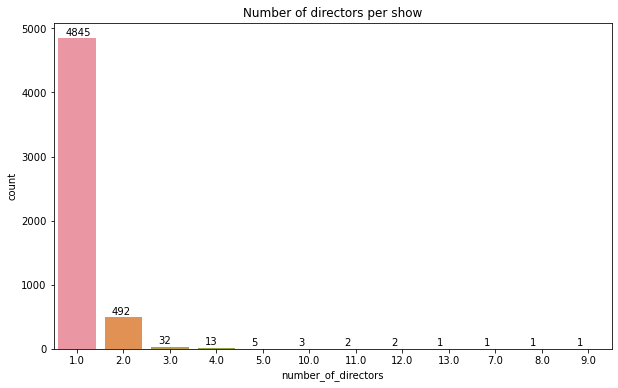

In [68]:
print(f'Number of shows with unknow director: {df.number_of_directors.isna().sum()}')

directors_cnt = df.dropna(subset=['number_of_directors']).number_of_directors.value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='number_of_directors', order=directors_cnt.index)
plt.title('Number of directors per show')

for cat, count in zip(ax.patches, directors_cnt.values):
    ax.annotate(count, (cat.get_x()+0.15, cat.get_height()+50))

In [86]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,int_duration,desc_len
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,136
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,148
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,149
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,145
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,143


## Cast column

### Actors who starred in the most shows

In [93]:
actor2show_cnt, actor2row_idx = get_column2show_data('cast')

sorted_actors = pd.DataFrame(sorted(actor2show_cnt.items(), reverse=True, key=lambda item: item[1]))
sorted_actors.columns = ['actor', 'number_of_shows']

In [94]:
sorted_actors.head(10)

,actor,number_of_shows
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,30
3,Om Puri,30
4,Takahiro Sakurai,29
5,Akshay Kumar,29
6,Boman Irani,27
7,Amitabh Bachchan,27
8,Paresh Rawal,27
9,Yuki Kaji,27


### Common show genres for actor

In [100]:
actors = sorted_actors.head(10).actor
for actor in actors:
    print(f'{actor} common genres: {get_person_genres(actor, actor2row_idx)} \n')

Anupam Kher common genres: {'Dramas': 28, 'Action & Adventure': 12, 'International Movies': 37, 'Comedies': 19, 'Romantic Movies': 7, 'Music & Musicals': 5, 'Thrillers': 2, 'Classic Movies': 1, 'Sci-Fi & Fantasy': 1, 'Independent Movies': 2, 'Crime TV Shows': 1, 'International TV Shows': 1, 'TV Comedies': 1, 'Children & Family Movies': 1} 

Shah Rukh Khan common genres: {'Action & Adventure': 11, 'Dramas': 28, 'International Movies': 32, 'Romantic Movies': 7, 'Comedies': 16, 'Sci-Fi & Fantasy': 1, 'Music & Musicals': 3, 'Thrillers': 1} 

Naseeruddin Shah common genres: {'Dramas': 26, 'International Movies': 25, 'Thrillers': 4, 'Action & Adventure': 3, 'Independent Movies': 9, 'Romantic Movies': 2, 'Comedies': 12, 'Sci-Fi & Fantasy': 1, 'Children & Family Movies': 2, 'Music & Musicals': 1, 'Documentaries': 1} 

Om Puri common genres: {'Children & Family Movies': 1, 'Comedies': 10, 'International Movies': 27, 'Dramas': 19, 'Faith & Spirituality': 1, 'Cult Movies': 1, 'Action & Adventure'

## Country column

In [133]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_size
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,11.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",9.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,10.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",8.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,5.0
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",9.0
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,8.0


### Shows per country

In [128]:
country2show_cnt, country2row_idx = get_column2show_data('country')
country2show_cnt = pd.DataFrame(country2show_cnt)
country2show_cnt.columns = ['country', 'show_cnt']
print(f'Unique countries in column: {df.country.nunique()}')
print(f'Countries count: {len(country2show_cnt)}')

Unique countries in column: 681
Countries count: 118


In [130]:
country2show_cnt.head(10)

,country,show_cnt
0,United States,3297
1,India,990
2,United Kingdom,723
3,Canada,412
4,France,349
5,Japan,287
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154
